In [3]:
from tqdm import tqdm
import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import math
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 读取数据

In [5]:
df1 = pd.read_csv("./data/data_x.csv",encoding='gbk')
df1

,Unnamed: 0,city,name,IntergrationValue_2,IntergrationValue_3,IntergrationValue_10,IntergrationValue_global,010000,050000,060000,...,090000,100000,110000,120000,130000,140000,150000,160000,170000,bulit_time
0,0,上海,莘庄,3.00,2.50,5.62,12.86,63606,86058,85140,...,66636,58942,31421,82527,81121,79013,82836,55170,83679,337
1,1,上海,外环路,3.00,2.50,7.12,13.70,82776,111192,111351,...,79953,72418,46011,101494,98174,95736,104819,66190,109091,337
2,2,上海,莲花路,3.00,3.00,8.88,14.65,90877,123123,122849,...,89531,81289,51029,112702,109068,106724,116126,74960,120684,337
3,3,上海,锦江乐园,4.20,4.59,11.08,15.73,97546,132358,131805,...,96250,87946,52084,122415,117475,115663,125813,80614,129541,337
4,4,上海,上海南站,9.17,8.08,13.49,16.98,94215,127653,127311,...,94878,86932,51960,118634,114359,112553,121382,79602,124961,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,101,青岛,琅琊,3.00,2.50,1.78,1.51,3156,7686,7951,...,4696,4534,317,4230,4744,5712,5576,1357,7035,30
3177,102,青岛,贡口湾,3.00,2.50,1.62,1.37,3414,8258,8486,...,5070,4883,341,4561,5108,6167,6010,1464,7591,30
3178,103,青岛,董家口港,3.00,2.50,1.43,1.23,3214,7981,8232,...,4574,4337,299,4019,4666,5769,5603,1288,7312,30
3179,104,青岛,泊里,3.00,2.00,1.22,1.11,3049,7536,7907,...,4058,3781,255,3560,4306,5198,5042,1148,6869,30


In [6]:
df2 = pd.read_csv(r"./data/data_y.csv",encoding='gbk')

df2 = df2[['population_score', 'esf_score','lp_score']]
df2

,population_score,esf_score,lp_score
0,93.730854,17947.118398,65644.983406
1,98.025722,21802.171231,71006.414330
2,102.352951,24154.384434,68617.706794
3,104.243526,24139.493412,17510.871230
4,148.339936,21802.171231,19405.906616
...,...,...,...
3176,3.430876,18185.617330,10552.683510
3177,3.612353,18185.617330,11011.020931
3178,3.507180,18185.617330,12897.167590
3179,3.360762,18185.617330,13763.678789


In [8]:
df = pd.concat([df1, df2], axis=1)
df

,Unnamed: 0,city,name,IntergrationValue_2,IntergrationValue_3,IntergrationValue_10,IntergrationValue_global,010000,050000,060000,...,120000,130000,140000,150000,160000,170000,bulit_time,population_score,esf_score,lp_score
0,0,上海,莘庄,3.00,2.50,5.62,12.86,63606,86058,85140,...,82527,81121,79013,82836,55170,83679,337,93.730854,17947.118398,65644.983406
1,1,上海,外环路,3.00,2.50,7.12,13.70,82776,111192,111351,...,101494,98174,95736,104819,66190,109091,337,98.025722,21802.171231,71006.414330
2,2,上海,莲花路,3.00,3.00,8.88,14.65,90877,123123,122849,...,112702,109068,106724,116126,74960,120684,337,102.352951,24154.384434,68617.706794
3,3,上海,锦江乐园,4.20,4.59,11.08,15.73,97546,132358,131805,...,122415,117475,115663,125813,80614,129541,337,104.243526,24139.493412,17510.871230
4,4,上海,上海南站,9.17,8.08,13.49,16.98,94215,127653,127311,...,118634,114359,112553,121382,79602,124961,337,148.339936,21802.171231,19405.906616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,101,青岛,琅琊,3.00,2.50,1.78,1.51,3156,7686,7951,...,4230,4744,5712,5576,1357,7035,30,3.430876,18185.617330,10552.683510
3177,102,青岛,贡口湾,3.00,2.50,1.62,1.37,3414,8258,8486,...,4561,5108,6167,6010,1464,7591,30,3.612353,18185.617330,11011.020931
3178,103,青岛,董家口港,3.00,2.50,1.43,1.23,3214,7981,8232,...,4019,4666,5769,5603,1288,7312,30,3.507180,18185.617330,12897.167590
3179,104,青岛,泊里,3.00,2.00,1.22,1.11,3049,7536,7907,...,3560,4306,5198,5042,1148,6869,30,3.360762,18185.617330,13763.678789


In [9]:
col_mask = df.columns.tolist()[3:]
df_ = df[col_mask]
df_ = (df_-df_.min())/(df_.max()-df_.min()) # min max 归一化
col_mask = df.columns.tolist()[0:3]
df = pd.concat([df[col_mask], df_], axis=1)
df

,Unnamed: 0,city,name,IntergrationValue_2,IntergrationValue_3,IntergrationValue_10,IntergrationValue_global,010000,050000,060000,...,120000,130000,140000,150000,160000,170000,bulit_time,population_score,esf_score,lp_score
0,0,上海,莘庄,0.134862,0.113895,0.247588,0.598990,0.484023,0.468876,0.465142,...,0.478384,0.497611,0.490353,0.473606,0.462781,0.467880,0.543548,0.472434,0.210656,0.191264
1,1,上海,外环路,0.134862,0.113895,0.327974,0.641414,0.629902,0.605816,0.608339,...,0.588330,0.602217,0.594135,0.599291,0.555220,0.609968,0.543548,0.494530,0.275522,0.209145
2,2,上海,莲花路,0.134862,0.151860,0.422294,0.689394,0.691548,0.670820,0.671156,...,0.653299,0.669043,0.662327,0.663938,0.628785,0.674789,0.543548,0.516793,0.315101,0.201179
3,3,上海,锦江乐园,0.215779,0.272589,0.540193,0.743939,0.742297,0.721136,0.720085,...,0.709603,0.720613,0.717802,0.719322,0.676213,0.724312,0.543548,0.526519,0.314850,0.030731
4,4,上海,上海南站,0.550910,0.537585,0.669346,0.807071,0.716949,0.695501,0.695533,...,0.687685,0.701499,0.698501,0.693988,0.667724,0.698703,0.543548,0.753387,0.275522,0.037052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,101,青岛,琅琊,0.134862,0.113895,0.041801,0.025758,0.024016,0.041876,0.043438,...,0.024520,0.029101,0.035449,0.031880,0.011383,0.039335,0.048387,0.007857,0.214669,0.007525
3177,102,青岛,贡口湾,0.134862,0.113895,0.033226,0.018687,0.025980,0.044993,0.046361,...,0.026439,0.031333,0.038272,0.034362,0.012280,0.042444,0.048387,0.008791,0.214669,0.009054
3178,103,青岛,董家口港,0.134862,0.113895,0.023044,0.011616,0.024458,0.043483,0.044974,...,0.023297,0.028622,0.035802,0.032035,0.010804,0.040884,0.048387,0.008250,0.214669,0.015344
3179,104,青岛,泊里,0.134862,0.075930,0.011790,0.005556,0.023202,0.041059,0.043198,...,0.020636,0.026414,0.032259,0.028827,0.009630,0.038407,0.048387,0.007497,0.214669,0.018234


In [10]:
city_counts = df['city'].value_counts().to_dict()
print(city_counts)

{'上海': 381, '北京': 346, '成都': 283, '广州': 245, '深圳': 236, '武汉': 213, '重庆': 191, '杭州': 169, '南京': 159, '西安': 153, '天津': 143, '郑州': 129, '青岛': 106, '宁波': 97, '合肥': 95, '南昌': 70, '无锡': 66, '厦门': 53, '福州': 46}


## 使用networkx可视化

In [12]:
G = nx.Graph()
# G.city = {}
city_limit = -1
cities = []
n = 0
for city in city_counts.keys():
    if 0 <= city_limit <= n:
        break

    print(f"city: {city}")
    cities.append(city)
    city_df = df[df['city']== city]
    metro_df = pd.read_csv(f"./data/metro/{city}/data_{city}地铁_raw.csv")
    subG = nx.Graph()
    subG.city = {}
    for idx, row in city_df.iterrows():
        subG.add_node(f"{city}-{row['name']}",
                      city=city,
                      city_idx = n,
                      subset=n,
                      POI010000=row['010000'],
                      POI050000=row['050000'],
                      POI060000=row['060000'],
                      POI070000=row['070000'],
                      POI080000=row['080000'],
                      POI090000=row['090000'],
                      POI100000=row['100000'],
                      POI110000=row['110000'],
                      POI120000=row['120000'],
                      POI130000=row['130000'],
                      POI140000=row['140000'],
                      POI150000=row['150000'],
                      POI160000=row['160000'],
                      POI170000=row['170000'],
                      built_time = row['bulit_time'],
                      pop_score = row['population_score'],
                      lp_score = row['lp_score'],
                      esf_score = row['esf_score'],
                      int_2 = row['IntergrationValue_2'],
                      int_3 = row['IntergrationValue_3'],
                      int_10 = row['IntergrationValue_10'],
                      int_global = row['IntergrationValue_global'],
                      )# 防止重名

    # 创建连接
    for route_index in range(metro_df['route_index'].max() + 1):
        route_df = metro_df[metro_df['route_index'] == route_index]
        name_list = route_df["name"].tolist()
        route_name = route_df['route_name'].tolist()[0]
        for i in range(len(name_list) - 1):
            subG.add_edge(f"{city}-{name_list[i]}", f"{city}-{name_list[i+1]}")

    print(subG.number_of_nodes())

    G.add_nodes_from(subG.nodes.data())
    G.add_edges_from(subG.edges.data())
    n += 1


# additional
dataKey2Col = {
    'city':0,
    'city_idx':1,
    'subset':2,
    'POI010000':3,
    'POI050000':4,
    'POI060000':5,
    'POI070000':6,
    'POI080000':7,
    'POI090000':8,
    'POI100000':9,
    'POI110000':10,
    'POI120000':11,
    'POI130000':12,
    'POI140000':13,
    'POI150000':14,
    'POI160000':15,
    'POI170000':16,
    'built_time':17,
    'pop_score':18,
    'lp_score':19,
    'esf_score':20,
    'int_2':21,
    'int_3':22,
    'int_10':23,
    'int_global':24
               }

city: 上海
381
city: 北京
346
city: 成都
283
city: 广州
245
city: 深圳
236
city: 武汉
212
city: 重庆
191
city: 杭州
169
city: 南京
159
city: 西安
153
city: 天津
143
city: 郑州
129
city: 青岛
106
city: 宁波
97
city: 合肥
95
city: 南昌
70
city: 无锡
66
city: 厦门
53
city: 福州
46


In [13]:
G.number_of_nodes()

3180

In [14]:
G.number_of_edges()

3451

In [15]:
import matplotlib.colors as cls
# import matplotlib.pyplot as plt
# import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = cls.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

In [16]:
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
def draw(G,pos, measures, title,labels):
    measures = dict(measures)

    nodes = nx.draw_networkx_nodes(G,pos, node_size=200, cmap=plt.cm.plasma, node_color=list(measures.values()), nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh = 0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos,edge_color='grey')
    label_dict = {}
    for key in measures:
        if len(labels) > 0 and key not in labels:
            continue
        label_dict[key] = str(key).split("-")[1]
        pos[key][0] -= 0.08

    nx.draw_networkx_labels(G, pos, label_dict,font_size=10,font_color='gray')
    plt.title(title)
    plt.rcParams['font.size'] =20
    clb = plt.colorbar(nodes)
    #设置颜色条的刻度
    # clb.ax.yaxis.set_major_locator(MultipleLocator(0.025))
    # clb.ax.yaxis.set_minor_locator(MultipleLocator(0.005))
    clb.ax.tick_params(labelsize=12.5)
    #设置颜色条的title
    # clb.ax.set_title(title,fontsize=12.5)
    plt.axis("off")

In [48]:
import matplotlib.colors as mcolors
def draw_ax(G,pos, sm, title,ax):
    sm = dict(sm)
    sorted_sm = sorted(dict(sm).items(),key=lambda  x :x[1],reverse=True)
    s_max = sorted_sm[0][1]
    s_min = sorted_sm[-1][1]
    max = sorted_measures[0][1]
    min = sorted_measures[-1][1]

    start = (s_min - min) / (max - min)
    end = 1 - (max - s_max) / (max - min)
    print(f"start : {start}, end: {end}")
    cmap  = plt.cm.plasma
    #cmap = plt.get_cmap("Spectral")
    cmap = truncate_colormap(cmap,start, end)
    nodes = nx.draw_networkx_nodes(G,pos, node_size=20, cmap=cmap, node_color=list(sm.values()), nodelist=sm.keys(),ax=ax)
    nodes.set_norm(mcolors.SymLogNorm(linthresh = 0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos,ax=ax)

    ax.set_title(title)
    ax.axis("off")

In [24]:
def city_idx_as_measure(G):
    measures = {}
    data = dict(G.nodes.data())
    for key in data:
        measures[key] = data[key]['city_idx']
    return measures

In [25]:
connected_components_count = 0
for each in nx.connected_components(G):
    connected_components_count += 1
print(f"连通域: {connected_components_count}")

连通域: 20


In [28]:
print((G.nodes.data()[list(G.nodes)[0]]))

{'city': '上海', 'city_idx': 0, 'subset': 0, 'POI010000': 0.48402340747730405, 'POI050000': 0.46887616390888137, 'POI060000': 0.46514168956681834, 'POI070000': 0.4682355251530128, 'POI080000': 0.494153306901109, 'POI090000': 0.4880220882798825, 'POI100000': 0.47594515592448444, 'POI110000': 0.40276104288973774, 'POI120000': 0.4783841124095715, 'POI130000': 0.49761073726697785, 'POI140000': 0.4903528097557948, 'POI150000': 0.47360567165032447, 'POI160000': 0.4627812169711611, 'POI170000': 0.4678803670176184, 'built_time': 0.5435483870967742, 'pop_score': 0.4724337724864775, 'lp_score': 0.19126435703920627, 'esf_score': 0.2106555733708427, 'int_2': 0.13486176668914363, 'int_3': 0.11389521640091116, 'int_10': 0.24758842443729903, 'int_global': 0.598989898989899}


### 指定measures

In [46]:
# measures = nx.eigenvector_centrality(G)
# or
measures = {}
for key in G.nodes.data():
    measures[key[0]] = key[1]['pop_score']
measures_name = "pop_score"

max : ('成都-省骨科医院', 1.0)
min : ('南京-明觉', 0.0)


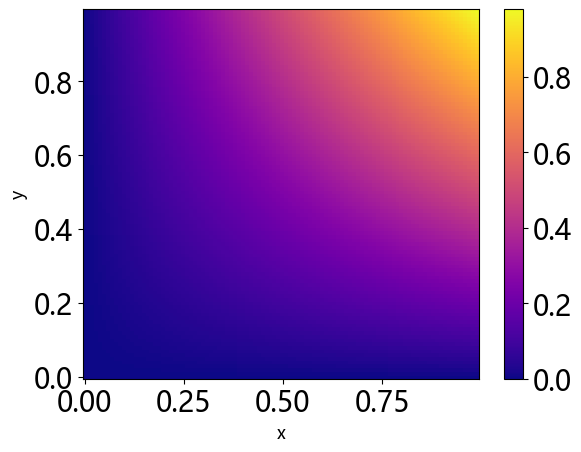

In [50]:
# 绘制整体的color bar
from matplotlib.ticker import AutoLocator

sorted_measures = sorted(dict(measures).items(),key=lambda  x :x[1],reverse=True)
print(f"max : {sorted_measures[0]}")
print(f"min : {sorted_measures[-1]}")
max = sorted_measures[0][1]
min = sorted_measures[-1][1]
xi = np.arange(0,1,0.01)
yi = np.arange(0,1,0.01)

X,Y = np.meshgrid(xi, yi)
Z = (max - min) * X * Y + min
colors=["magenta","blueviolet","royalblue","aqua","springgreen","greenyellow","yellow","orangered","red","white"]
clrmap=mcolors.LinearSegmentedColormap.from_list("mycmap",colors)

plt.pcolor(X,Y,Z,cmap=plt.cm.plasma)
#设置xy轴标签
plt.gca().set_xlabel("x",fontsize=12.5)
plt.gca().set_ylabel("y",fontsize=12.5)
plt.gca().xaxis.set_major_locator(AutoLocator())
plt.gca().yaxis.set_major_locator(AutoLocator())

plt.colorbar()
plt.savefig(f'output/{measures_name}_all_colorBar.jpg',dpi=300)

### 绘制给定城市的network

max : ('南京-安德门', 0.44679698603912404)
min : ('南京-明觉', 0.0)


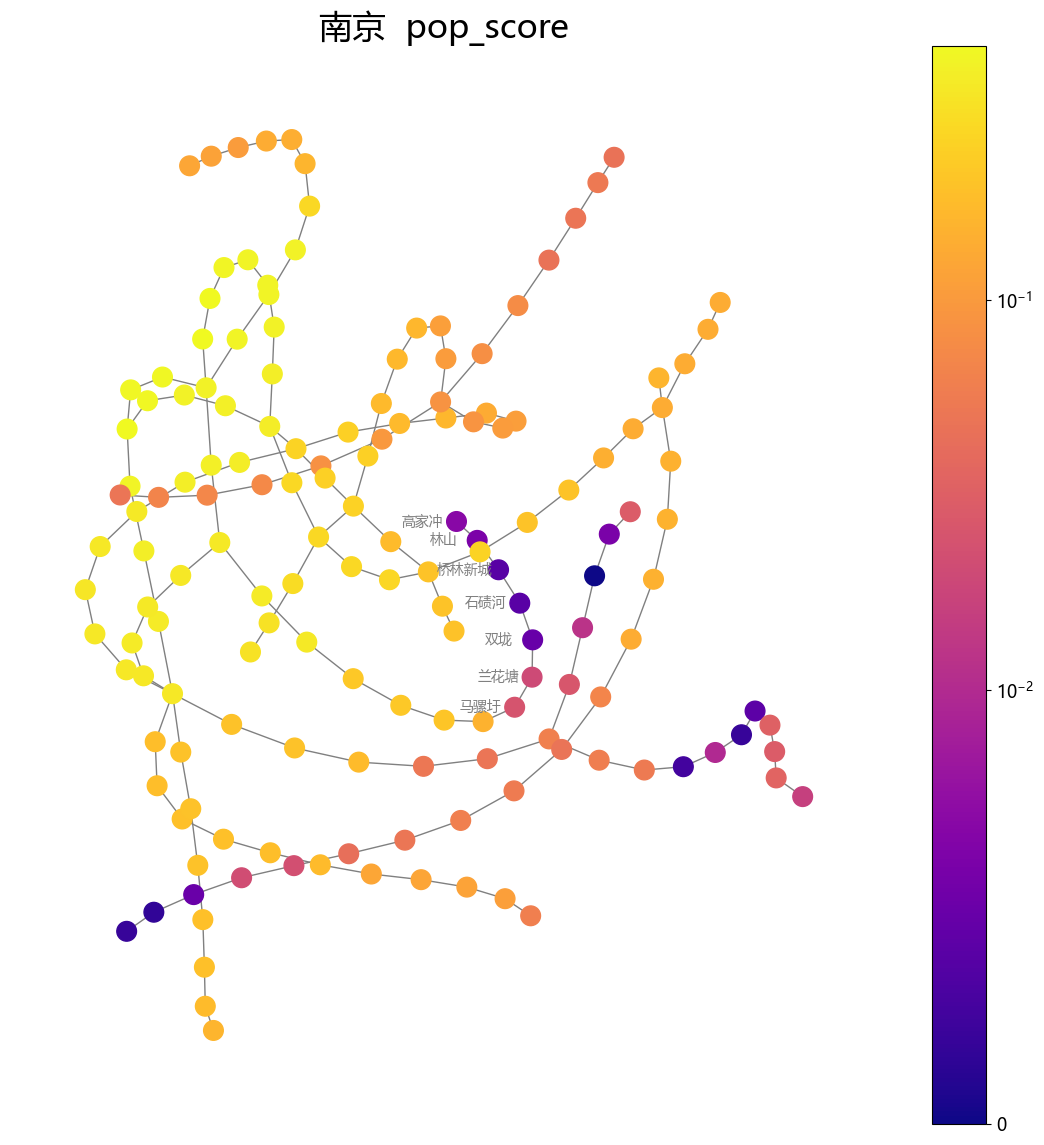

In [47]:
selected_city = "南京"

index = 0
nodes = list(G.nodes)
found = False
for city in cities:
    each = []
    sub_measures = {}
    while index < len(nodes) and (G.nodes.data()[nodes[index]])['city']==city :
        node = nodes[index]
        each.append(node)
        sub_measures[node] = measures[node]
        index += 1
    if city != selected_city:
        continue
    else:
        found = True
        subG = G.subgraph(each)
        sorted_submeasures = sorted(dict(sub_measures).items(),key=lambda  x :x[1],reverse=True)
        print(f"max : {sorted_submeasures[0]}")
        print(f"min : {sorted_submeasures[-1]}")

        pos = nx.spring_layout(subG,seed=3,iterations=50)
        plt.figure(figsize=(14,14))
        draw(subG, pos, sub_measures,f"{city}  {measures_name}" , labels=[
           '南京-高家冲','南京-林山','南京-桥林新城','南京-石碛河', '南京-双垅','南京-兰花塘','南京-马骡圩'
        ])
        plt.savefig(f'output/{measures_name}_{city}.jpg',dpi=300)
        break

if not found:
    print(f"{selected_city} not in city list")


### 绘制所有城市的network

start : 0.007771486397946347, end: 0.9210345709850607
start : 0.021726337858228608, end: 0.5121847709646986
start : 0.010736668276667175, end: 1.0
start : 0.017477412047511996, end: 0.8493208736741735
start : 0.10522190299631778, end: 0.819195948209003
start : 0.0006695201889623813, end: 0.6775172188003246
start : 0.023348908859073546, end: 0.5405643496209064
start : 0.015739936801842172, end: 0.6029796007305408
start : 0.0, end: 0.4467969860391241
start : 0.012375013272973431, end: 0.9277307040857669
start : 0.017538547855752974, end: 0.7580091342958102
start : 0.025339416278513282, end: 0.7673378319952079
start : 0.002320109839279708, end: 0.3906515071196053
start : 0.023013395049545034, end: 0.30865389533132903
start : 0.0009149740537582197, end: 0.2815923044798472
start : 0.019854444093505345, end: 0.28121545210099974
start : 0.041661859053650115, end: 0.3477895587869929
start : 0.052543857996915896, end: 0.39301118571266613
start : 0.07758494202663091, end: 0.4379336726539613


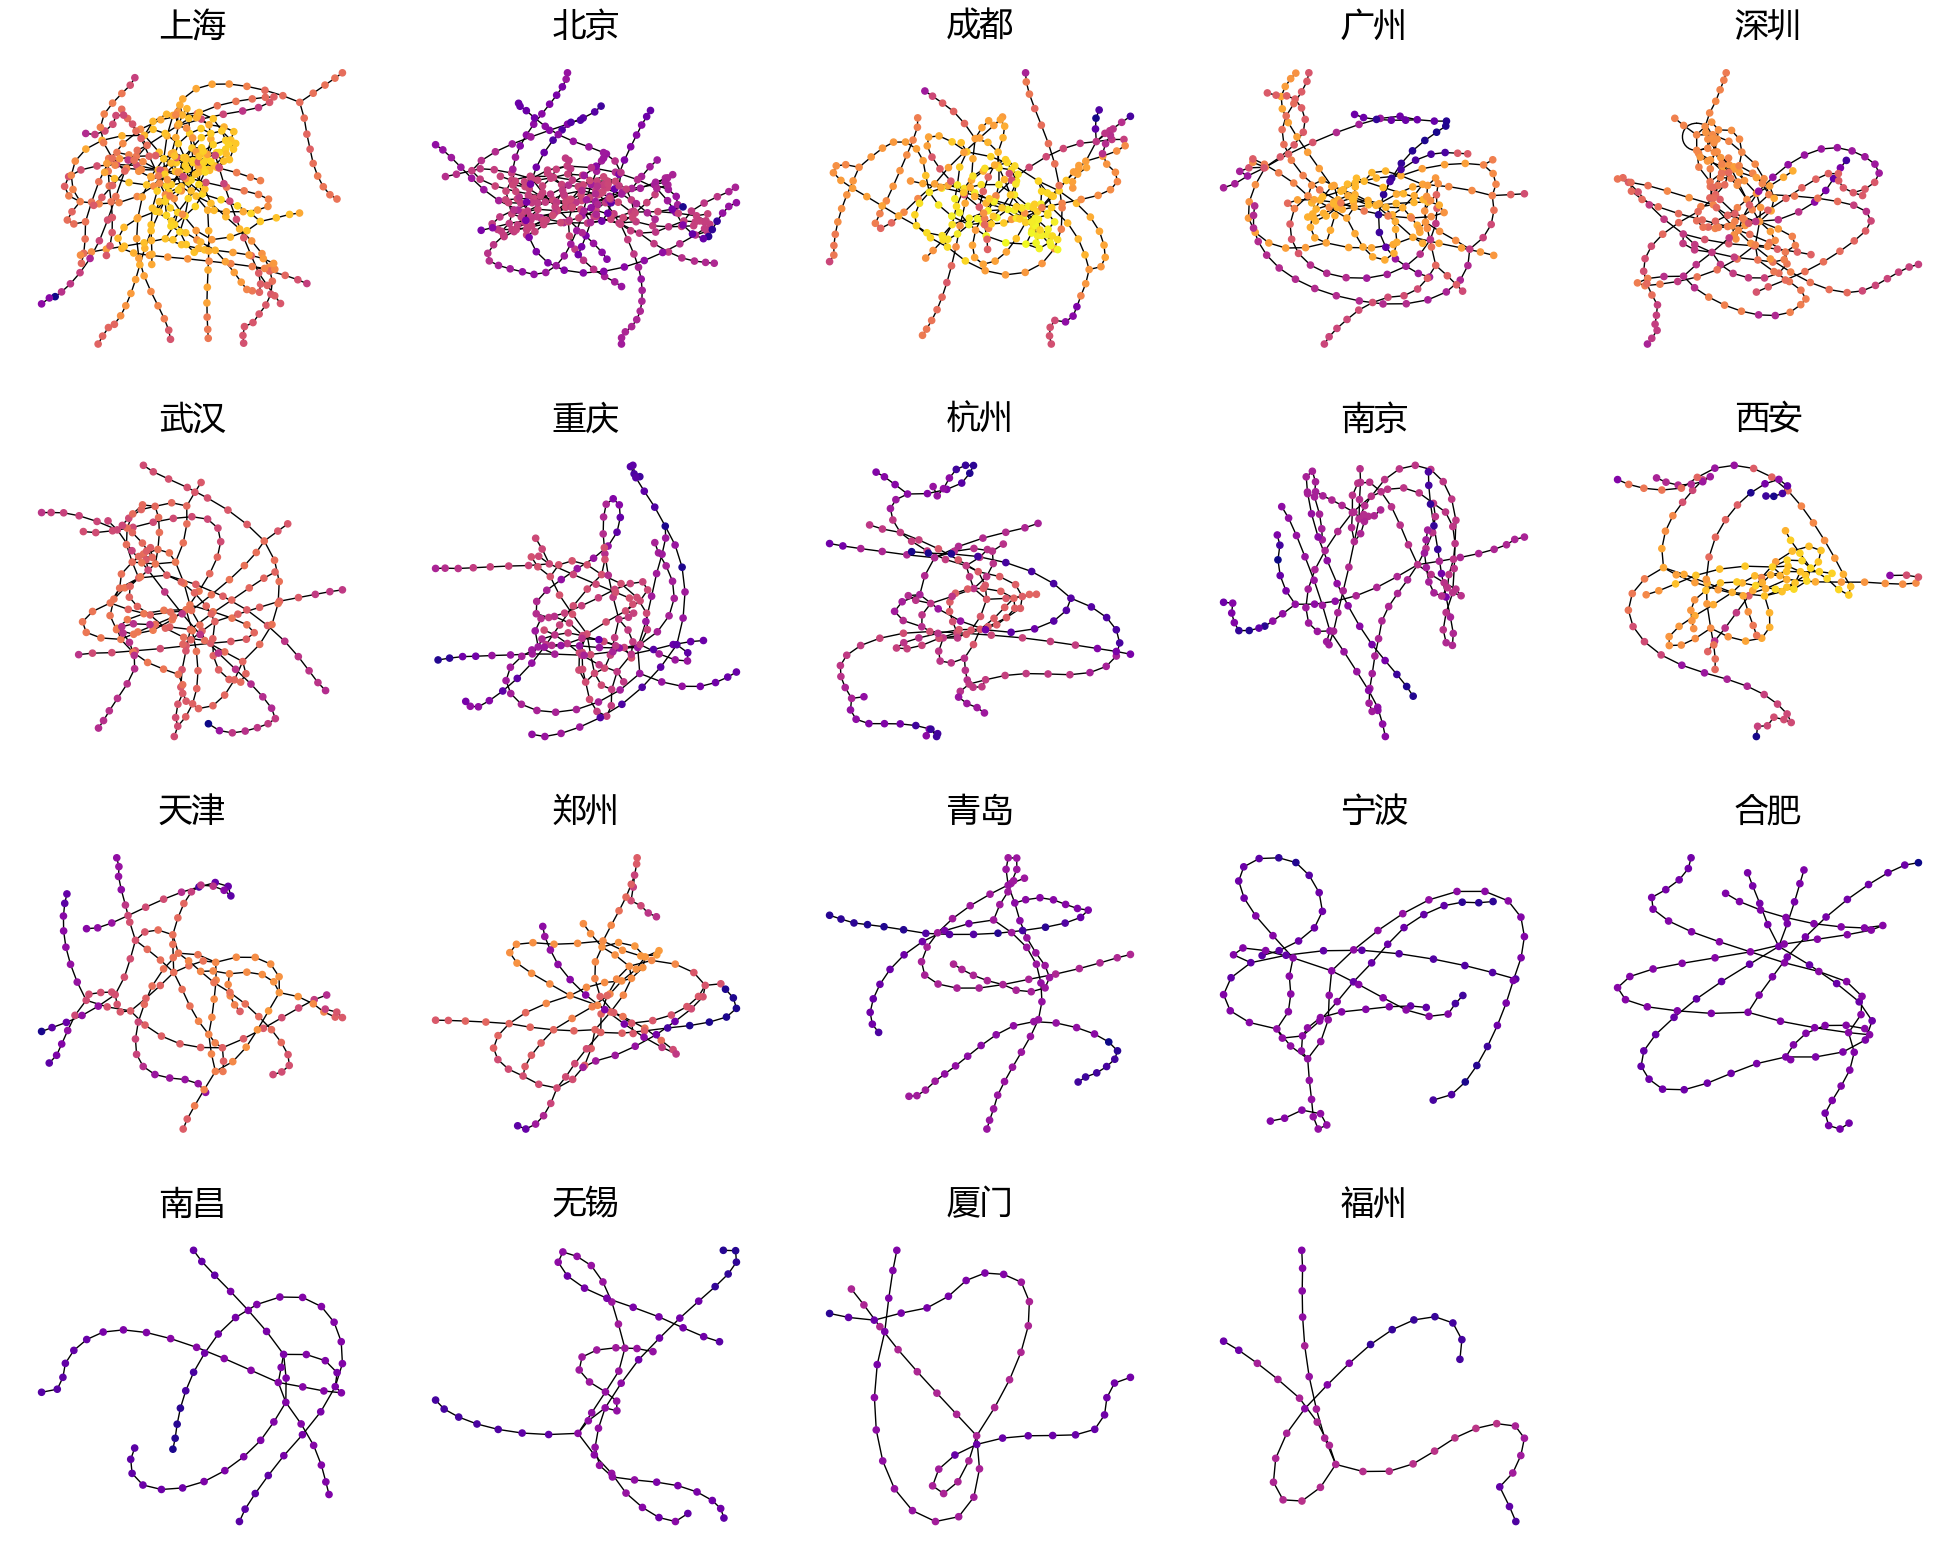

In [51]:

x_count = int(math.ceil(math.sqrt(len(cities))))
y_count = int(math.ceil(len(cities) / x_count))
fig = plt.figure( figsize=(x_count * 4,y_count * 4))
axgrid = fig.add_gridspec(y_count, x_count)


n = 0
index = 0
nodes = list(G.nodes)
for city in cities:
    each = []
    sub_measures = {}
    while index < len(nodes) and (G.nodes.data()[nodes[index]])['city']==city:
        node = nodes[index]
        each.append(node)
        sub_measures[node] = measures[node]
        index += 1
    subG = G.subgraph(each)
    sorted_submeasures = sorted(dict(sub_measures).items(),key=lambda  x :x[1],reverse=True)
    x = n % x_count
    y = int(math.floor(n / x_count))
    ax = fig.add_subplot(axgrid[y:y+1, x:x+1])
    pos = nx.spring_layout(subG,seed=123,iterations=50)
   # measures = city_idx_as_measure(subG)
    draw_ax(subG, pos, sub_measures, city,ax)
    n+=1
fig.tight_layout()

#plt.show()
plt.savefig(f'output/{measures_name}_all.jpg',dpi=300)




## PCA 降维可视化

In [55]:
col_mask = df.columns.tolist()[3:]
df_ = df[col_mask]
X = np.array(df_)
X

array([[0.13486177, 0.11389522, 0.24758842, ..., 0.47243377, 0.21065557,
        0.19126436],
       [0.13486177, 0.11389522, 0.32797428, ..., 0.49453006, 0.27552172,
        0.20914535],
       [0.13486177, 0.15186029, 0.42229368, ..., 0.51679285, 0.31510069,
        0.20117874],
       ...,
       [0.13486177, 0.11389522, 0.02304394, ..., 0.00824988, 0.21466862,
        0.01534424],
       [0.13486177, 0.07593014, 0.01178992, ..., 0.00749658, 0.21466862,
        0.01823416],
       [0.        , 0.        , 0.        , ..., 0.00791588, 0.21466862,
        0.01804473]])

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
embed_2d = pca.fit_transform(X)

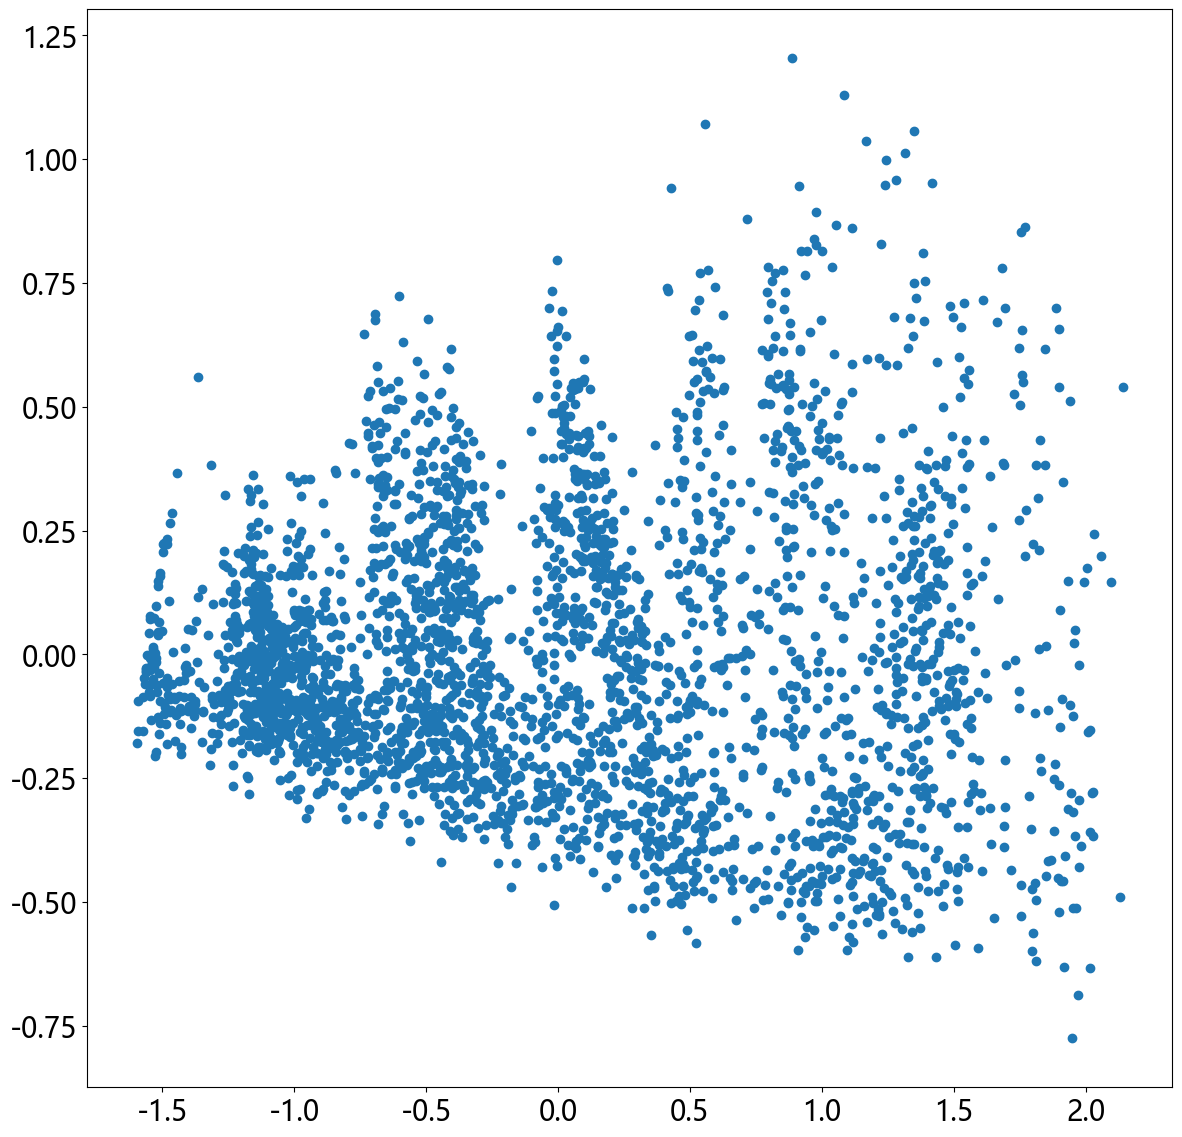

In [57]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.show()

In [69]:

# 输入词条，输出词典中的索引号
term2index = {}
name_list = df["name"].to_list()
city_list = df['city'].to_list()
for i in range(len(name_list)):
    term2index[f"{city_list[i]}-{name_list[i]}"] = i


In [58]:
print(dataKey2Col.keys())

dict_keys(['city', 'city_idx', 'subset', 'POI010000', 'POI050000', 'POI060000', 'POI070000', 'POI080000', 'POI090000', 'POI100000', 'POI110000', 'POI120000', 'POI130000', 'POI140000', 'POI150000', 'POI160000', 'POI170000', 'built_time', 'pop_score', 'lp_score', 'esf_score', 'int_2', 'int_3', 'int_10', 'int_global'])


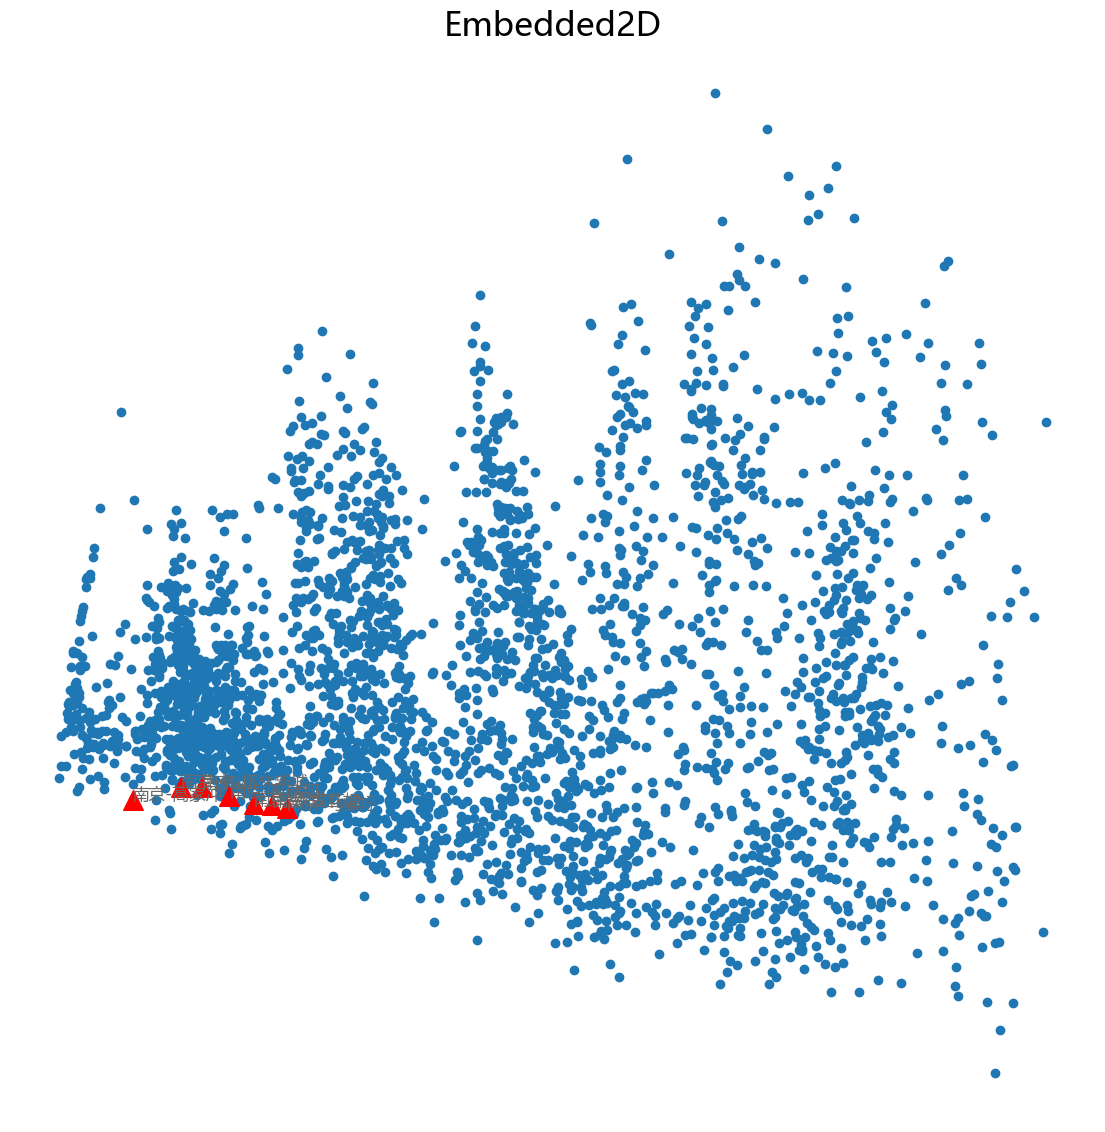

In [72]:

terms_chosen = ['南京-高家冲','南京-林山','南京-桥林新城','南京-石碛河', '南京-双垅','南京-兰花塘','南京-马骡圩']

plt.figure(figsize=(14,14))
s = plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1], c="r", s = 200, marker='^')
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='dimgray',fontsize=12)
plt.title(f"Embedded2D")
plt.axis('off')
plt.show()